In [438]:
import tensorflow as tf
import pandas as pd
import numpy as np
import keras
from io import BytesIO
from keras.models import Sequential
from keras.layers import LSTM, Dense,Dropout,Activation,TimeDistributed
from keras.regularizers import L1L2
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import TimeseriesGenerator
from google.colab import files
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from pylab import rcParams
#rcParams['figure.figsize'] = 20,10

In [439]:
def create_lookBack(data,look_back = 3):
  val_x = []
  val_y = []
  for i in range(len(data)-look_back-1):
    val_x.append(data[i:(i+look_back),0])
    val_y.append(data[i+look_back,0])
  return np.array(val_x),np.array(val_y)  

In [440]:
def train_test_split(percent,data):
  split = int(percent*len(data))
  train = data[:split]
  test = data[split:]
  print(len(train),len(test),data.shape)
  return train,test 


In [441]:
def one_hot_encoding(data,encoding):
  label_data = []
  for value in data:
    one_hot = [0 for _ in range(encoding)]
    one_hot[int(value*10)] = 1
    label_data.append(one_hot)
  return np.array(label_data)  

In [442]:
uploaded = files.upload()

Saving bonum.csv to bonum (2).csv


In [443]:
df = pd.read_csv(BytesIO(uploaded['bonum.csv']))

In [444]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5090 entries, 0 to 5089
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Period  5090 non-null   int64
 1   Price   5090 non-null   int64
 2   Num     5090 non-null   int64
dtypes: int64(3)
memory usage: 119.4 KB


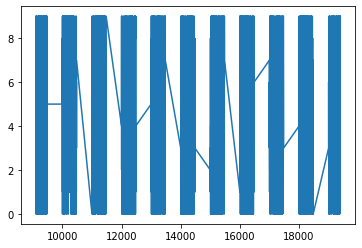

In [445]:
period = df["Period"].values
period = np.mod(period,100000)
num = df["Num"].values
plt.plot(period,num)
plt.show()


In [446]:
np.random.seed(7)
data = df['Num'].values
data = data[::-1]
data = np.reshape(data,(data.shape[0],1))
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(data)
train,test = train_test_split(0.85,dataset)

4326 764 (5090, 1)


In [447]:
np.random.seed(7)
data = df['Num'].values
data = data.astype("float32")
data = data.reshape((-1,1))
data = data[::-1]
dataset = data/10
np.unique(dataset)
train,test = train_test_split(0.85,dataset)
print(dataset)

4326 764 (5090, 1)
[[0.7]
 [0.9]
 [0.7]
 ...
 [0.5]
 [0.3]
 [0.9]]


In [448]:
look_back = 8
train_x,train_y = create_lookBack(train,look_back)
test_x,test_y = create_lookBack(test,look_back)
train_x = np.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))
test_x = np.reshape(test_x, (test_x.shape[0], 1, test_x.shape[1]))

In [449]:
print(train_y)

[0.  0.2 0.4 ... 0.7 0.6 0.8]


In [433]:
#one-hot encoding
np.random.seed(7)
data = df['Num'].values
data = data.astype("float32")
data = data.reshape((-1,1))
data = data[::-1]
dataset = data/10
np.unique(dataset)
train,test = train_test_split(0.85,dataset)
x = []
look_back = 8
train_x,train_y = create_lookBack(train,look_back)
test_x,test_y = create_lookBack(test,look_back)
k = test_y*10
for i in k:
  x.append((i)%2)
test_y = np.array(x)  
x = []
k = train_y*10
for i in k:
  x.append((i)%2)
train_y = np.array(x)  
train_x = np.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))
test_x = np.reshape(test_x, (test_x.shape[0], 1, test_x.shape[1]))
print(np.unique(train_y))

4326 764 (5090, 1)
[0. 1.]


In [171]:
reg = L1L2(l1=0.01, l2=0.01)
model = Sequential()
model.add(LSTM(200, input_shape=(1, look_back),return_sequences = True,bias_regularizer=reg,activation="relu"))
model.add(Dropout(0.4))
model.add(LSTM(200,return_sequences = True,bias_regularizer=reg,activation="relu"))
model.add(Dropout(0.4))
model.add(LSTM(100,return_sequences = True,bias_regularizer=reg,activation="relu"))
model.add(Dropout(0.2))
model.add(LSTM(50,return_sequences = False,bias_regularizer=reg,activation="relu"))

model.add(Dense(1))
model1.add(Activation('linear'))
model.compile(loss='mean_squared_error', optimizer='adam')

In [143]:
reg = L1L2(l1=0.001, l2=0.001)
model1 = Sequential()
model1.add(LSTM(64,input_shape = (1, look_back),bias_regularizer=reg, return_sequences = True,activation="relu"))
model1.add(Dropout(0.2))
model1.add(LSTM(128,return_sequences = True,bias_regularizer=reg,activation="relu"))
model1.add(Dropout(0.3))
model1.add(LSTM(128,return_sequences = True,bias_regularizer=reg,activation="relu"))
model1.add(Dropout(0.4))
model1.add(LSTM(64,return_sequences = True,bias_regularizer=reg,activation="relu"))
#model1.add(Dropout(0.2))
model1.add(LSTM(512,return_sequences = True,bias_regularizer=reg,activation="relu"))
model1.add(Dropout(0.35))
model1.add(LSTM(64,return_sequences = True,bias_regularizer=reg,activation="relu"))
model1.add(LSTM(64,return_sequences = False,bias_regularizer=reg,activation="relu"))
model1.add(Dropout(0.2))
model1.add(Dense(1))
model1.add(Activation('linear'))
model1.compile(loss="mean_squared_error", optimizer="adam")

In [450]:
reg = L1L2(l1=0.01, l2=0.01)
model2 = Sequential()
model2.add(LSTM(10, input_shape=(1, look_back),return_sequences = False))
model2.add(Dense(1, activation='linear'))
model2.compile(loss='mse', optimizer='adam')

In [451]:
model2.fit(train_x,train_y,epochs = 350,verbose=2, shuffle=False)

Epoch 1/350
135/135 - 0s - loss: 0.1306
Epoch 2/350
135/135 - 0s - loss: 0.0902
Epoch 3/350
135/135 - 0s - loss: 0.0874
Epoch 4/350
135/135 - 0s - loss: 0.0856
Epoch 5/350
135/135 - 0s - loss: 0.0846
Epoch 6/350
135/135 - 0s - loss: 0.0839
Epoch 7/350
135/135 - 0s - loss: 0.0835
Epoch 8/350
135/135 - 0s - loss: 0.0833
Epoch 9/350
135/135 - 0s - loss: 0.0832
Epoch 10/350
135/135 - 0s - loss: 0.0831
Epoch 11/350
135/135 - 0s - loss: 0.0830
Epoch 12/350
135/135 - 0s - loss: 0.0830
Epoch 13/350
135/135 - 0s - loss: 0.0830
Epoch 14/350
135/135 - 0s - loss: 0.0830
Epoch 15/350
135/135 - 0s - loss: 0.0829
Epoch 16/350
135/135 - 0s - loss: 0.0829
Epoch 17/350
135/135 - 0s - loss: 0.0829
Epoch 18/350
135/135 - 0s - loss: 0.0829
Epoch 19/350
135/135 - 0s - loss: 0.0829
Epoch 20/350
135/135 - 0s - loss: 0.0829
Epoch 21/350
135/135 - 0s - loss: 0.0829
Epoch 22/350
135/135 - 0s - loss: 0.0829
Epoch 23/350
135/135 - 0s - loss: 0.0829
Epoch 24/350
135/135 - 0s - loss: 0.0829
Epoch 25/350
135/135 - 0s

In [452]:
trainPredict = model2.predict(train_x)
testPredict = model2.predict(test_x)
testPredict.shape

(755, 1)

In [453]:
x = []
for i in trainPredict:
  if i<0.5:
    x.append(0)
  else:
    x.append(1)
count = 0
for i,j in zip(train_y,x):
  if i == j:
    count = count+1  

print(count,len(train_y))    

445 4317


In [462]:

yhat = model2.predict_classes(train_x)
len(np.where(yhat==0)[0])

4249

In [454]:
import math
trainPredict = np.reshape(trainPredict,(trainPredict.shape[0],1))
testPredict = np.reshape(testPredict,(testPredict.shape[0],1))
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([train_y])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([test_y])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 2.58 RMSE
Test Score: 2.56 RMSE


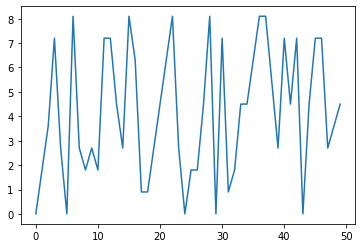

<Figure size 1440x720 with 0 Axes>

In [463]:
train_plot = [(i,j) for i,j in zip(trainPredict[:50],trainY[0][:50])]
plt.plot(trainY[0][:50])
plt.figure(figsize=(20,10))
plt.show()

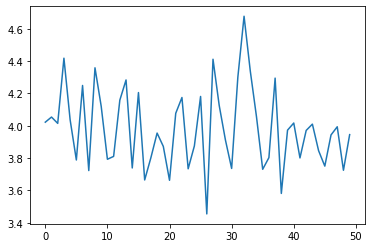

In [464]:
train_plot = [(i,j) for i,j in zip(testY[0][:50],testPredict[:50])]
plt.plot(trainPredict[:50])
plt.show()

In [ ]:
val_x = [4,6,3,8,2]
val_x = val_x[::-1]
val_x = np.array(val_x)/10
val_x = np.reshape(val_x,(1,1,5))

In [ ]:
val = np.squeeze(np.round(model.predict(val_x)*10))
print("red" if val%2==0 else "green")

green


In [ ]:
model.predict(val_x)

array([[0.47765648]], dtype=float32)

In [ ]:
val_x = [9,4,9,9,4,1,7,7,4,2]
val_x = np.array(val_x)/10
val_x = np.reshape(val_x,(1,1,10))